Reference Data and Code:  https://www.kaggle.com/code/agustikamayangsari/network-graph-for-stack-overflow/notebook

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Input data files check
from subprocess import check_output


In [5]:
import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('data/stack_network_nodes.csv')
df_edges = pd.read_csv('data/stack_network_links.csv')

In [6]:
df_nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [7]:
df_edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


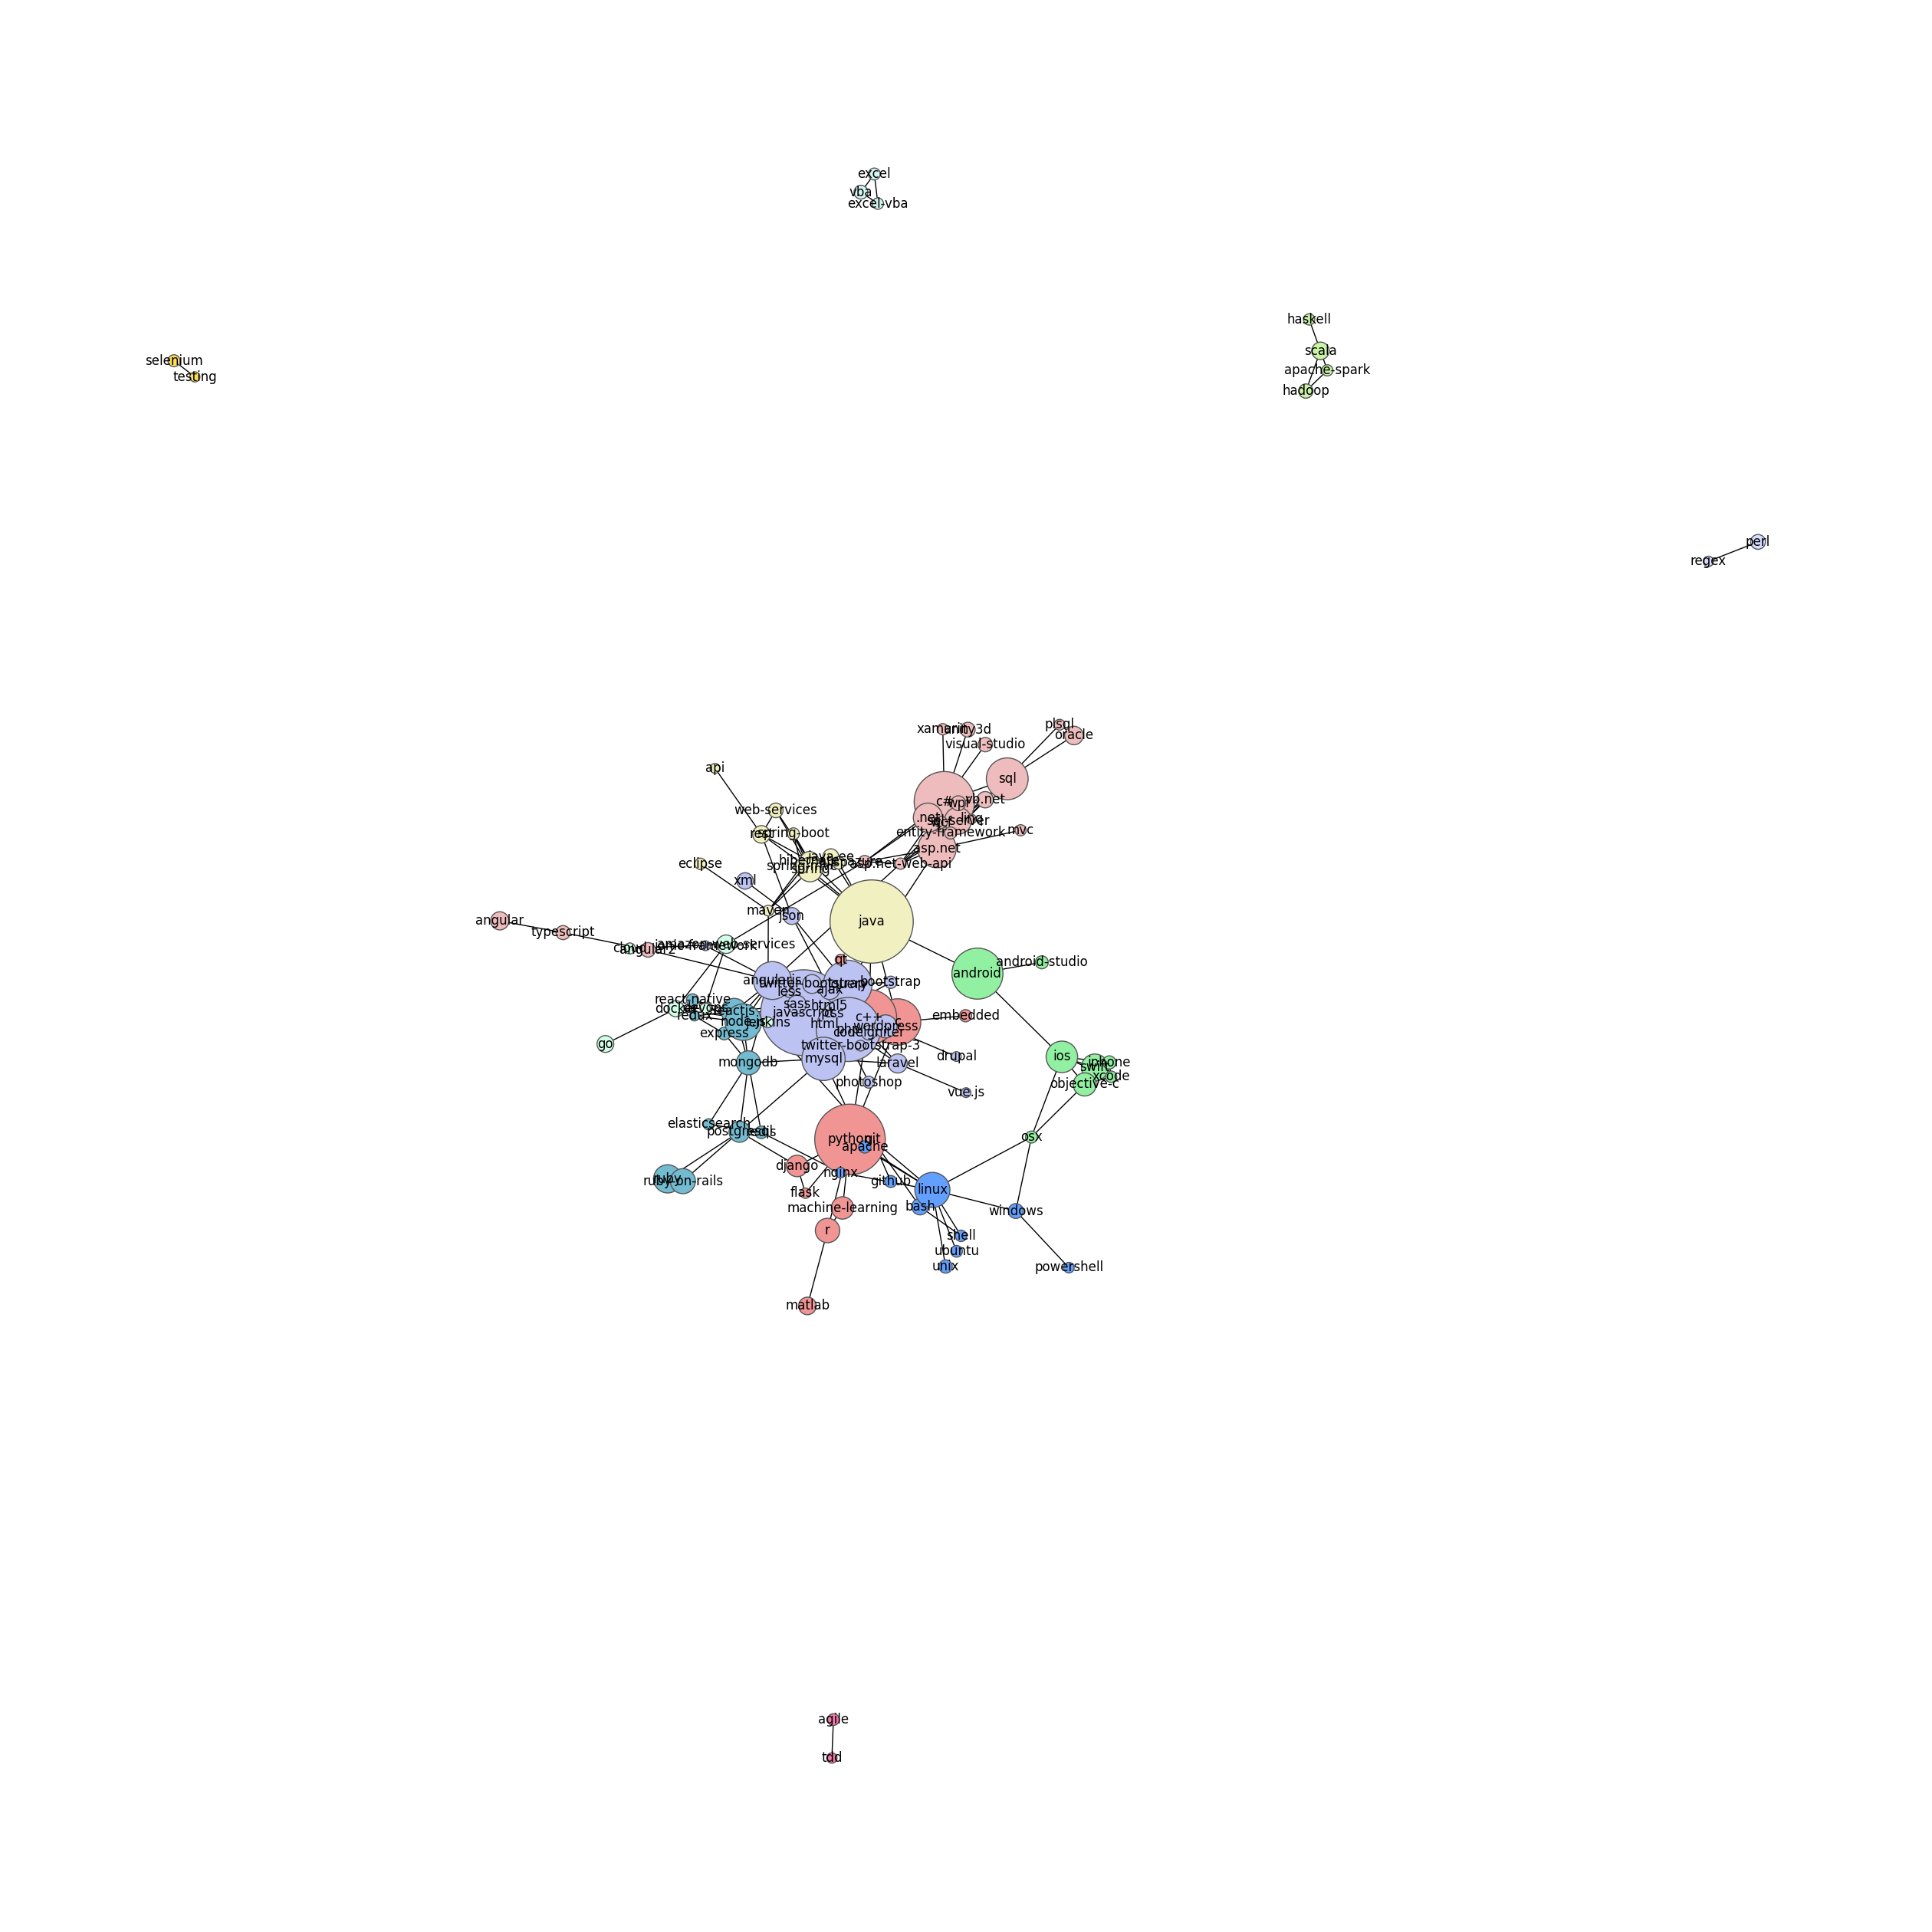

In [3]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#000000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

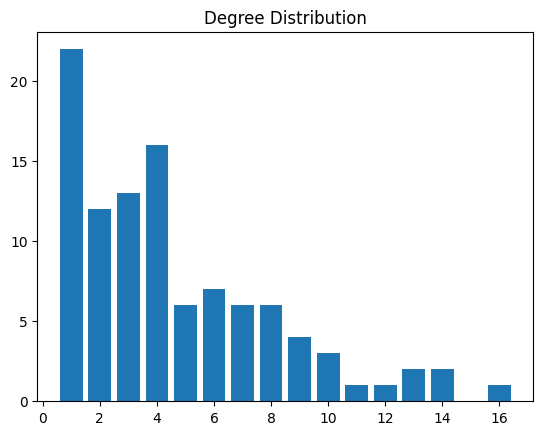

In [4]:
import collections

#draw degree distribution
components = nx.connected_components(G)
largest_component = max(components, key=len)
G_large = G.subgraph(largest_component)
def plot_degree_distribution(G_large):
    degree_sequence = sorted([d for n, d in G_large.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.title("Degree Distribution")
    plt.bar(deg, cnt)
  
plot_degree_distribution(G_large)

In [8]:
### Find the average shortest path length
print(nx.average_shortest_path_length(G_large))

4.507862550960978


In [21]:
v = 'html'
nx.node_connected_component(G, 0)

KeyError: 0